# Network Mining

## Lab 4: Centrality Measures and Community Detection

#### Notebook Author: Mario Prado

In [6]:
import networkx as nx
G = nx.barabasi_albert_graph(12, 6)
nx.draw(G)

# Centrality
Centrality is a term to describe importance of individual
nodes in a graph/network. Below is the list of different metrics to 
find it (in NetworkX):

### Degree

In [9]:
nx.degree_centrality(G)
nx.in_degree_centrality(G.to_directed())
nx.out_degree_centrality(G.to_directed())

{0: 0.18181818181818182,
 1: 0.4545454545454546,
 2: 0.2727272727272727,
 3: 0.5454545454545454,
 4: 0.5454545454545454,
 5: 0.09090909090909091,
 6: 1.0,
 7: 0.9090909090909092,
 8: 0.7272727272727273,
 9: 0.6363636363636364,
 10: 0.6363636363636364,
 11: 0.5454545454545454}

### Eigenvector

In [11]:
nx.eigenvector_centrality(G)
nx.katz_centrality(G)

{0: 0.1661083390332272,
 1: 0.25917258550496786,
 2: 0.19944992717665685,
 3: 0.2909079931877776,
 4: 0.2909079931877776,
 5: 0.12869356289974754,
 6: 0.38584728382472816,
 7: 0.37414787026460505,
 8: 0.3334159770271497,
 9: 0.3152841690184568,
 10: 0.3173541679307973,
 11: 0.2819425808750271}

### Closeness

In [12]:
nx.closeness_centrality(G)

{0: 0.55,
 1: 0.6470588235294118,
 2: 0.5789473684210527,
 3: 0.6875,
 4: 0.6875,
 5: 0.5238095238095238,
 6: 1.0,
 7: 0.9166666666666666,
 8: 0.7857142857142857,
 9: 0.7333333333333333,
 10: 0.7333333333333333,
 11: 0.6875}

### Betweenness (Shortest Path)

In [17]:
nx.edge_betweenness_centrality(G)
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.00606060606060606,
 2: 0.0,
 3: 0.00606060606060606,
 4: 0.00606060606060606,
 5: 0.0,
 6: 0.31393939393939396,
 7: 0.13212121212121208,
 8: 0.044242424242424236,
 9: 0.013939393939393939,
 10: 0.00909090909090909,
 11: 0.013939393939393939}

### Link Analysis

In [21]:
nx.pagerank(G)
nx.hits(G) # Returns HITS hubs and authorities values for nodes
nx.hub_matrix(G) # Returns the HITS hub matrix
nx.authority_matrix(G) # Returns the HITS Authority Matrix

matrix([[ 2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  2.],
        [ 2.,  5.,  3.,  5.,  5.,  1.,  4.,  4.,  3.,  3.,  5.,  2.],
        [ 2.,  3.,  3.,  3.,  3.,  1.,  2.,  2.,  2.,  3.,  3.,  2.],
        [ 2.,  5.,  3.,  6.,  6.,  1.,  5.,  5.,  4.,  4.,  5.,  3.],
        [ 2.,  5.,  3.,  6.,  6.,  1.,  5.,  5.,  4.,  4.,  5.,  3.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  4.,  2.,  5.,  5.,  0., 11.,  9.,  7.,  6.,  6.,  5.],
        [ 1.,  4.,  2.,  5.,  5.,  1.,  9., 10.,  7.,  6.,  6.,  5.],
        [ 2.,  3.,  2.,  4.,  4.,  1.,  7.,  7.,  8.,  6.,  5.,  6.],
        [ 2.,  3.,  3.,  4.,  4.,  1.,  6.,  6.,  6.,  7.,  5.,  6.],
        [ 2.,  5.,  3.,  5.,  5.,  1.,  6.,  6.,  5.,  5.,  7.,  4.],
        [ 2.,  2.,  2.,  3.,  3.,  1.,  5.,  5.,  6.,  6.,  4.,  6.]])

## Example 1
Using the Zachary’s Karate Club graph(basically a social network of
members of an university karate club, where undirected edges
connects people who interact outside the club) already in network:
    
• G = nx.karate_club_graph()

And the directed graph with the following edge list:
    
• ([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4), (5, 6), (6, 2),
    (6, 5), (7, 2), (7, 5), (8, 2), (8, 5), (9, 2), (9, 5), (10, 5),
    (11, 5)])

• Calculate the following centrality measures:
• Degree, Closeness, Betweeness, Hits and PageRank

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# This function is for drawing heat maps
def draw_heat(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, 
                                   cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys())
                                  )
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

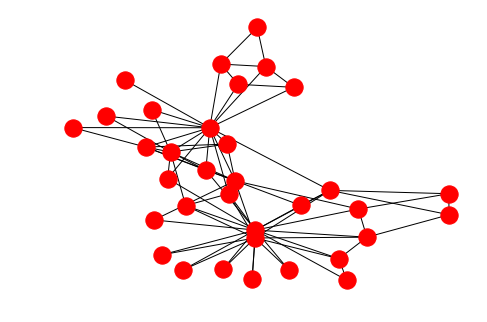

In [8]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G)

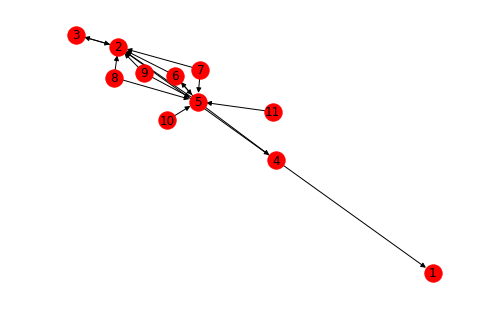

In [9]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])

dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5, 0.5], 6: [0.8, 0.5], 7: [0.22, 0.3], 8: [0.3, 0.27],
        9: [0.38, 0.24], 10: [0.7, 0.3], 11: [0.75, 0.35]
       }
nx.draw(DiG, with_labels=True)

### Degree Centrality

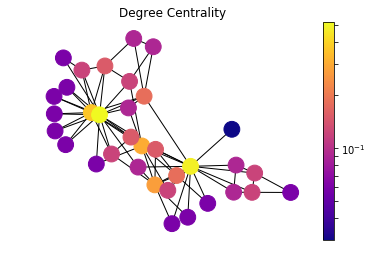

In [44]:
draw_heat(G, pos, nx.degree_centrality(G), 'Degree Centrality')

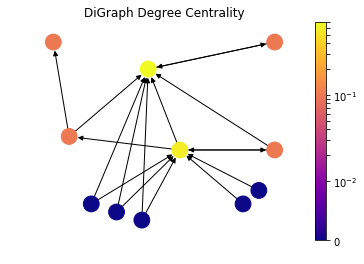

In [48]:
draw_heat(DiG, dpos, nx.in_degree_centrality(DiG), 
          'DiGraph Degree Centrality')

### Eigenvector Centrality

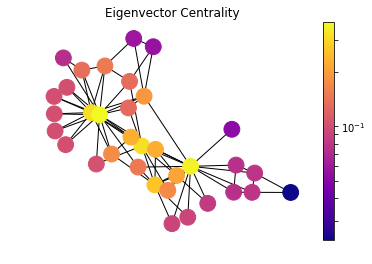

In [49]:
draw_heat(G, pos, nx.eigenvector_centrality(G), 
          'Eigenvector Centrality')

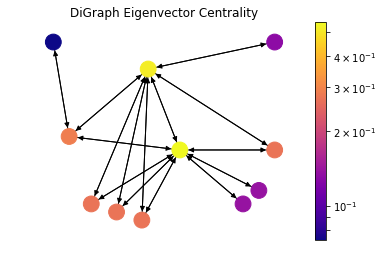

In [10]:
udG = DiG.to_undirected()
strConG = udG.to_directed()
draw_heat(strConG, dpos, nx.eigenvector_centrality_numpy(strConG), 
          'DiGraph Eigenvector Centrality')

### Betweenness and Closeness Centrality

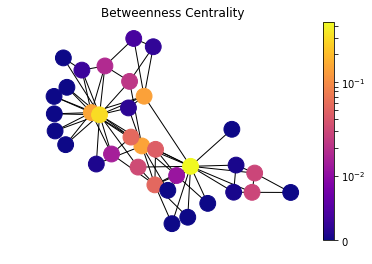

In [52]:
draw_heat(G, pos, nx.betweenness_centrality(G), 
          'Betweenness Centrality')

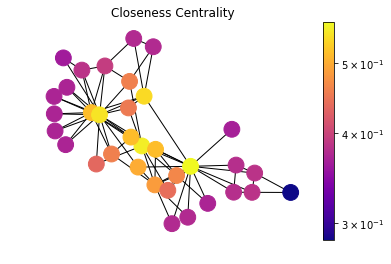

In [53]:
draw_heat(G, pos, nx.closeness_centrality(G), 
          'Closeness Centrality')

### HITS Centrality

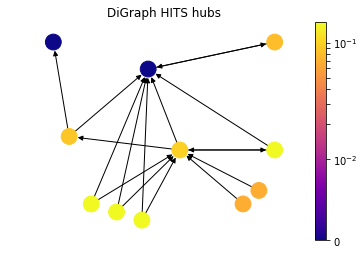

In [54]:
h, a = nx.hits(DiG)
draw_heat(DiG, dpos, h, 
          'DiGraph HITS hubs')

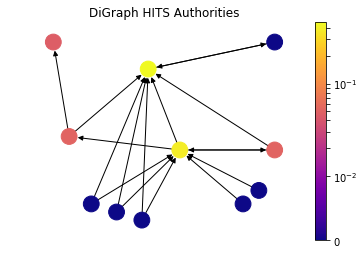

In [55]:
draw_heat(DiG, dpos, a, 
          'DiGraph HITS Authorities')

### PageRank

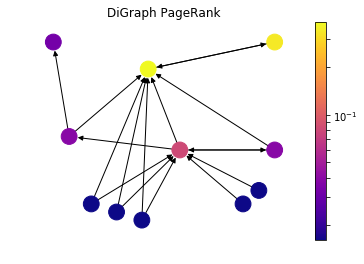

In [57]:
draw_heat(DiG, dpos, nx.pagerank(DiG), 
          'DiGraph PageRank')

# Communities

#### General Considerations

• Communities – How nodes cluster into densely connected graphs

• Community detection – How to identify communities of nodes and partition networks

• Cliques – How to understand networks by finding the most highlyconnected components

• K – Cores – How to simplify networks by focusing on the most
highly connected nodes

• NetworkX provides several community detection algorithms. They take a Graph object and return a List of communities, represented as a set of nodeIDs.

In [24]:
import networkx as nx
from networkx.algorithms import community
import networkx.algorithms.community as nxcom

G = nx.karate_club_graph()

# Bipartitions (Partition a graph into two blocks using the 
# Kernighan–Lin algorithm)

community.kernighan_lin_bisection(G)

# K-Clique (Find k-clique communities in graph using the percolation
# method.)

community.k_clique_communities(G, k=5)

# Modularity-based communities (Find communities in graph using
# Clauset-Newman-Moore greedy modularity maximization)
# This package is not included on my version of networkx

#nxcom.greedy_modularity_communities(G)

# Partitions via centrality measures
community.girvan_newman(G)

<generator object girvan_newman at 0x000001812C5A9B88>

## Example 2

Find the number of communities in the karate graph using the:

• Greedy modularity algorithm

• Girvan newman algorithm

• Find the cliques and the maximum cliques in the karate graph

• Calculate the k - cores with k = 1,2,3,4

### Girvan-Newman

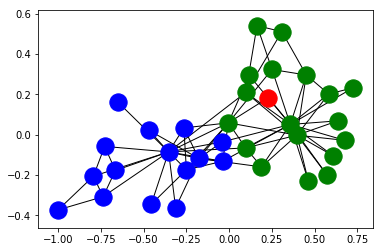

In [36]:
import networkx as nx
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)

top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
com_list = sorted(map(sorted, next_level_communities))

nx.draw_networkx_nodes(G,pos, nodelist=com_list[0], 
                       node_color='blue', with_labels=True)
nx.draw_networkx_nodes(G,pos, nodelist=com_list[1], 
                       node_color='green', with_labels=True)
nx.draw_networkx_nodes(G,pos, nodelist=com_list[2], 
                       node_color='red', with_labels=True)
nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges(),edge_color='black')

### Cliques

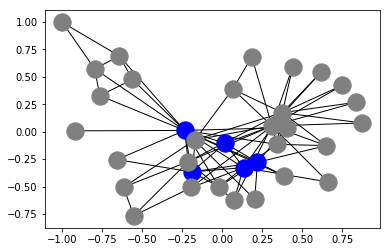

In [25]:
# Finding the max clique
G = nx.karate_club_graph()
cliques = list(nx.find_cliques(G))
max_clique = max(cliques, key=len)
max_clique

# Drawing the example
pos = nx.spring_layout(G)
n_not_max_clique = [x for x in list(G.nodes()) if x not in max_clique]
nx.draw_networkx_nodes(G,pos, nodelist=max_clique, node_color='b',
                      with_labels=True)
nx.draw_networkx_nodes(G,pos, nodelist=n_not_max_clique, 
                       node_color='gray', with_labels=True)
nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges(),edge_color='black')


### K-Cores

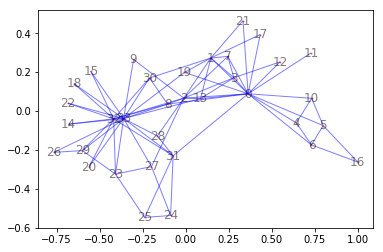

In [29]:
G_core_1 = nx.k_core(G, 1)

pos = nx.spring_layout(G)
nx.draw_networkx(G_core_1, pos=pos, node_size=1, edge_color='blue',
                with_labels=True, alpha=0.5)

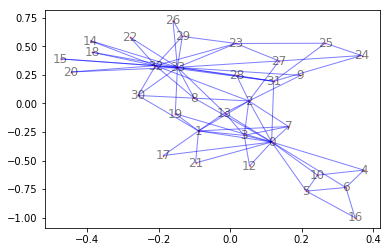

In [30]:
G_core_2 = nx.k_core(G, 2)

pos = nx.spring_layout(G)
nx.draw_networkx(G_core_2, pos=pos, node_size=1, edge_color='blue',
                with_labels=True, alpha=0.5)

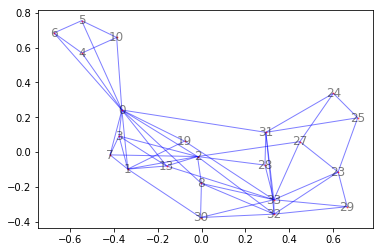

In [31]:
G_core_3 = nx.k_core(G, 3)

pos = nx.spring_layout(G)
nx.draw_networkx(G_core_3, pos=pos, node_size=1, edge_color='blue',
                with_labels=True, alpha=0.5)

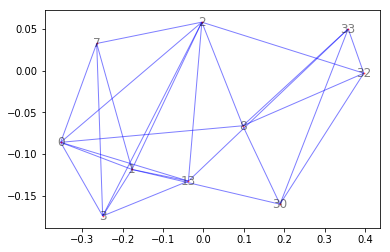

In [32]:
G_core_4 = nx.k_core(G, 4)

pos = nx.spring_layout(G)
nx.draw_networkx(G_core_4, pos=pos, node_size=1, edge_color='blue',
                with_labels=True, alpha=0.5)